#Plant Disease Detector

In this project we will create a Convolutioal Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameter fro building, traning and testing this classification model. We will be using tensorflow and keras for this project.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive"

'Colab Notebooks'   plant_disease.h5	 Plant_images_pianalytix
 dog-vision	    plant_disease.json	 plant_model_weights.weights.h5


Next we will import all the required libraries.As we are making CNN model we will import all the required layers, activations, optimizers, etc.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

Now let's see some of the image in datasets. i start with 12 imges using matplotlib library.

In [5]:
# Ploting 12 images to check
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)#width of image
  plt.ylabel(rand_img.shape[0], fontsize=10)#height of image
plt.show()

now we must convert the images into numpy array because there will be normalization in our dataset.

In [6]:
#converting images to array function
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None



Now we will convert all the images into numpy array.

In [ ]:
dir = "/content/drive/MyDrive/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [],[]
all_labels = ["Corn_Common_rust", "Potato-Early_blight", "Tomato-Bacterial_spot"]
binary_labels = [0,1,2]
temp =-1

#Readign and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


image must be observed to check the data is balanced or not

In [ ]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

In [ ]:
image_list[0].shape

In [ ]:
label_list = np.array(label_list)
label_list.shape

Next we will use sklearn train_test_split to split the dataset into testing and training data. Here i have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

Normalize the dataset of our images. As pixel values ranges from 0 t0 255 so we will divide each image pixel image with 255 to normalize the dataset.

In [ ]:
x_train = np.array(x_train, dtype=np.float16)/ 255.0
x_test = np.array(x_test, dtype = np.float16) / 255.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1, 256, 256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Next we will create a network architectur for the model. We use different types of layers according to their features.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

While compiling the model we need to set the type of loss which will be Binary Crossentropy for our model alongwith this we also need to set the optimaizer and the matrics respectively.

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=["accuracy"])

In [ ]:
# Splitting the training data set into training and validation data sests
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10, shuffle=True)


Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 50 epochs and batch of 128.

In [ ]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Saving this model using different techniques.

In [ ]:
model.save("/content/drive/MyDrive/plant_disease.h5")
#serialize model to json
json_model = model.to_json()
#save the model architectur to JSON file
with open("/content/drive/MyDrive/plant_disease.json", "w") as json_file:
  json_file.write(json_model)
#saving the weights of the model
model.save_weights("/content/drive/MyDrive/plant_model_weights.weights.h5")

Now ploting the accuracy of the model for the training history

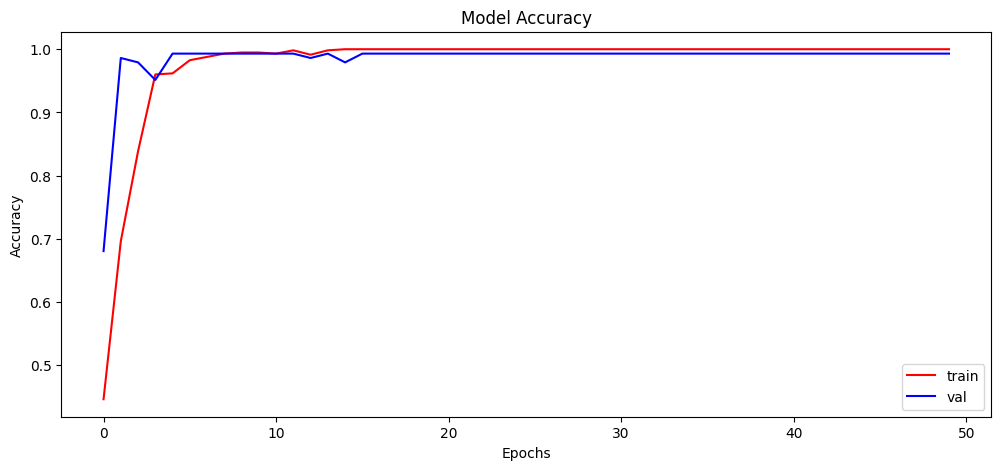

In [27]:
 #Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Next we will use our model to predict predicting the testing dataset label.

In [26]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


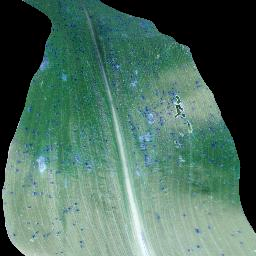

In [24]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [25]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


## Conclusion

In this project, we successfully built a Convolutional Neural Network (CNN) model capable of accurately classifying plant images into three distinct categories. The workflow included image preprocessing, dataset balancing verification, splitting the data into training/validation/test sets, normalizing pixel values, and one-hot encoding the labels. After correcting the data-splitting pipeline to ensure that each image matched the correct label, the model was able to train effectively without overfitting.